### 【課題1】練習のために特徴量とカテゴリを選択
選び方は合計18通りありますが、以下の組み合わせで練習することにします。irisデータセットをWeek3同様に取得した後、データフレームからこれらを抜き出してください。

- virgicolorとvirginica
- sepal_lengthとpetal_length

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

data = load_iris()

X = pd.DataFrame(data=data.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
X = X[['sepal_length', 'petal_length']]
y = pd.DataFrame(data=data.target, columns=['Species'])

df = pd.concat([X, y], axis=1)
df = df.query('Species==[1, 2]')
df.describe()

,sepal_length,petal_length,Species
count,100.000000,100.000000,100.000000
mean,6.262000,4.906000,1.500000
std,0.662834,0.825578,0.502519
min,4.900000,3.000000,1.000000
25%,5.800000,4.375000,1.000000
50%,6.300000,4.900000,1.500000
75%,6.700000,5.525000,2.000000
max,7.900000,6.900000,2.000000


In [2]:
df

,sepal_length,petal_length,Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


### 【問題2】データの分析
まずはデータの分析を行いますが、これはWeek3の課題1で行いました。その際出力した散布図行列を見ることで、先ほどの18通りそれぞれの散布図も確認できます。sepal_lengthとpetal_lengthを使い、virgicolorとvirginicaを分類するのは少し難しそうな状況であることが分かるはずです。

ここでは復習を兼ねて、抜き出したデータの散布図と箱ひげ図（boxplot）、バイオリン図（violinplot）を表示してください。

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

<function matplotlib.pyplot.show(*args, **kw)>

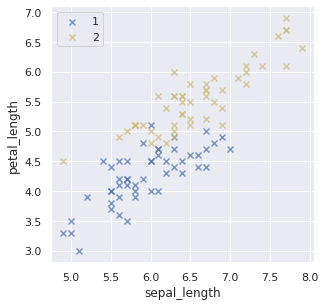

In [4]:
# 散布図
label = [1, 2]
columns = list(df.columns)
del(columns[-1])

sns.set()
sns.set_style('darkgrid')
sns.set_palette('Blues')

list_color = ['r', 'b', 'y']

plt.figure(figsize=(16, 16))

cnt = 0

for i, column1 in enumerate(columns):
    for column2 in columns[i+1:]:
        plt.subplot(3, 3, cnt+1)
        plt.xlabel(column1)
        plt.ylabel(column2)
        cnt += 1
        
        for j in label: 
            plt.scatter(df[df['Species'] == j][column1],
                        df[df['Species'] == j][column2],
                        marker="x", alpha=0.7,
                        c=list_color[j], label=str(j))
        plt.legend()

plt.show

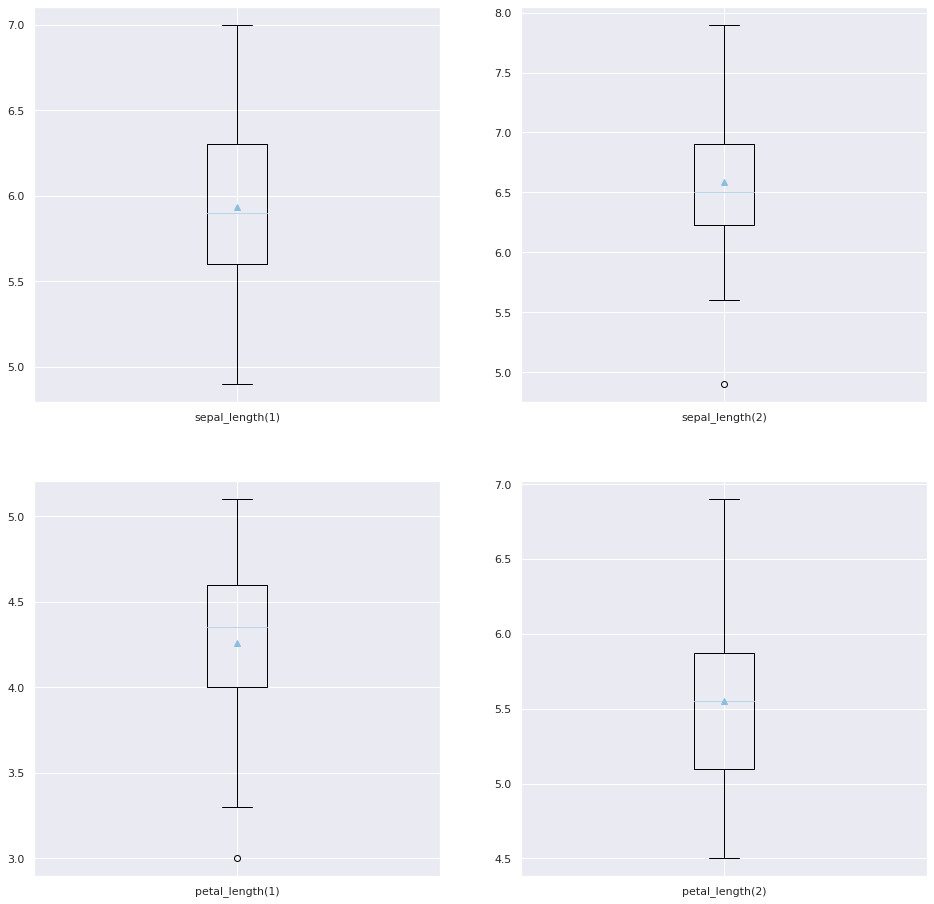

In [5]:
# 箱ひげ図
plt.figure(figsize=(16, 16))

for i, column in enumerate(columns):
    for j in label:
        plt.subplot(len(columns), len(label), (len(label)*i)+j)
        plt.boxplot(df[df['Species'] == j][columns[i]],
                    labels=[columns[i]+'('+str(j)+')'],
                    showmeans=True)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

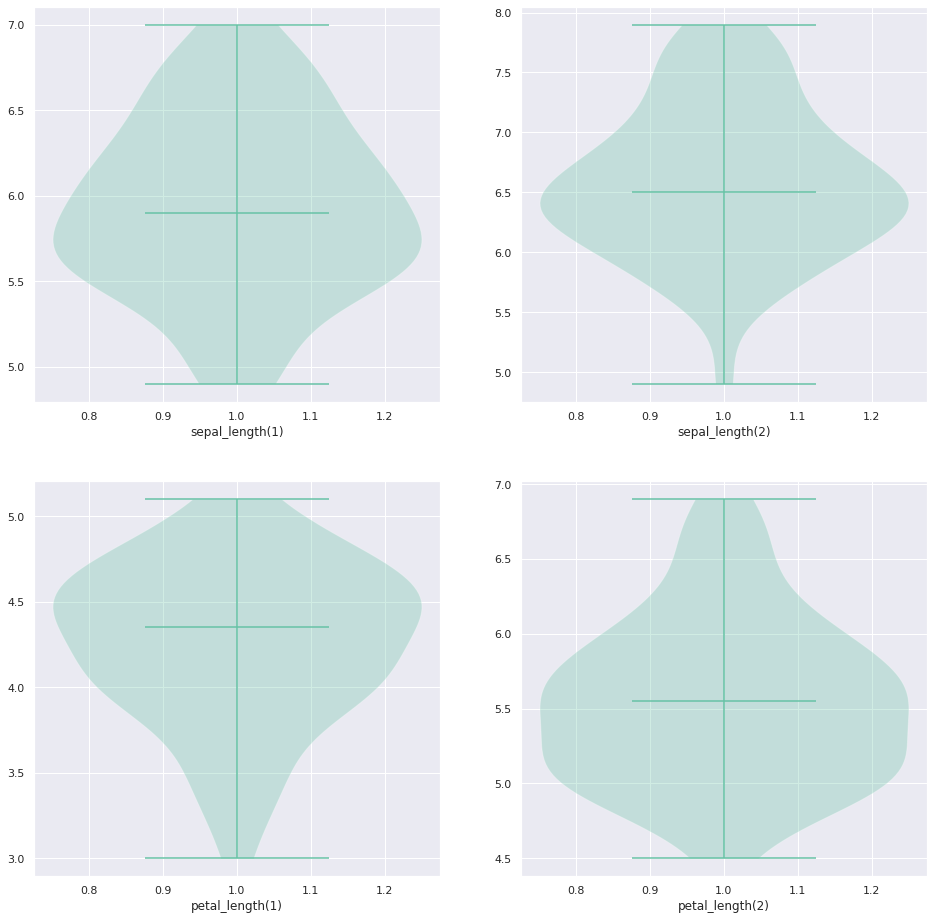

In [6]:
# バイオリン図
sns.set()
sns.set_style('darkgrid')
sns.set_palette('Set2')

plt.figure(figsize=(16, 16))

for i, column in enumerate(columns):
    for j in label:
        plt.subplot(len(columns), len(label), (len(label)*i)+j)
        plt.xlabel(columns[i]+'('+str(j)+')')
        plt.violinplot(df[df['Species'] == j][columns[i]],
                       showmedians=True)
plt.show

【問題3】前処理・訓練データと検証データの分割
前処理の一貫として、訓練データと検証データの分割を行います。今回は訓練データ75%、検証データ25%として分割してください。


scikit-learnのtrain_test_splitが利用できます。公式ドキュメントのExamplesを参考に動かしてください。

《注意点》


データの分析まではPandasのDataFrameを使用してきました。しかし、scikit-learnはNumPyのndarrayを想定して作られています。そのため、この段階でndarrayへの変換を行いましょう。特徴量（説明変数）をX、正解（目的変数）をyというndarrayに格納します。


《分割する理由》


分類問題の目的は未知のデータを正しく分類することです。その目的が達成できているかを確認するため、実際には答えの分かっているデータの一部を学習には使わず残しておきます。この学習に使用していないデータで推定を行い、そこから求めた指標値によって検証します。学習に使うデータを訓練データ、検証に使うデータが検証データで、一般的に7対3から8対2程度の割合にします。

In [7]:
from sklearn.model_selection import train_test_split
import numpy as np

In [8]:
X = np.array(df[['sepal_length', 'petal_length']])
y = np.array(df['Species'])

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=32)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(75, 2)
(25, 2)
(75, 1)
(25, 1)


In [9]:
X_train

array([[6.8, 5.9],
       [5.8, 3.9],
       [5.5, 4.4],
       [6.4, 4.5],
       [6.7, 4.4],
       [6.9, 5.1],
       [6.1, 4. ],
       [6.4, 5.3],
       [7. , 4.7],
       [5.5, 3.7],
       [7.2, 6. ],
       [7.7, 6.7],
       [6.6, 4.4],
       [5.6, 3.6],
       [6.3, 5.6],
       [5.6, 4.5],
       [5.7, 4.1],
       [5.8, 4.1],
       [6.2, 4.5],
       [5.9, 4.8],
       [6. , 4.5],
       [6.7, 5.7],
       [6.9, 5.7],
       [6.1, 4.6],
       [6.3, 5.1],
       [6.5, 5.1],
       [4.9, 4.5],
       [6.2, 5.4],
       [6.1, 4.9],
       [5.8, 5.1],
       [5.8, 5.1],
       [7.7, 6.9],
       [6.2, 4.3],
       [6.3, 5.6],
       [5.7, 4.2],
       [6.2, 4.8],
       [6.4, 5.6],
       [7.2, 5.8],
       [6.3, 4.4],
       [6.4, 5.6],
       [5.5, 3.8],
       [6.3, 4.9],
       [6.3, 4.7],
       [7.7, 6.7],
       [5.8, 5.1],
       [7.1, 5.9],
       [5.7, 3.5],
       [6.7, 5.7],
       [6.7, 5.2],
       [5.9, 5.1],
       [5.6, 4.1],
       [6. , 5. ],
       [7.3,

In [10]:
X_test

array([[6.3, 4.9],
       [5.5, 4. ],
       [7.7, 6.1],
       [6.5, 5.2],
       [7.6, 6.6],
       [6. , 5.1],
       [7.4, 6.1],
       [6.1, 4.7],
       [6.7, 5. ],
       [6.3, 5. ],
       [5.6, 4.2],
       [5.7, 4.2],
       [6.7, 5.8],
       [6.1, 4.7],
       [5.1, 3. ],
       [6.1, 5.6],
       [6.9, 4.9],
       [6.5, 5.5],
       [5.7, 5. ],
       [6.7, 4.7],
       [6.8, 4.8],
       [6.6, 4.6],
       [4.9, 3.3],
       [6. , 4. ],
       [7.2, 6.1]])

### 【問題4】前処理・標準化
分類精度をあげるための加工を行います。手法ごとに適切な方法は異なりますが、ここでは一例として 標準化 を行うことにします。

標準化を行うライブラリもscikit-learnに用意されています。これを使って標準化してください。

《注意点》
標準化は訓練用のデータでfitを行い、訓練用、検証用双方のデータにtransformを行います。検証データは学習の段階には存在しない未知のデータの代わりなので、標準化のための平均や標準偏差の計算に使ってはいけません。

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
X_train_scaled

array([[ 8.83883476e-01,  1.23141255e+00],
       [-6.75910894e-01, -1.23141255e+00],
       [-1.14384920e+00, -6.15706275e-01],
       [ 2.59965728e-01, -4.92565020e-01],
       [ 7.27904039e-01, -6.15706275e-01],
       [ 1.03986291e+00,  2.46282510e-01],
       [-2.07972583e-01, -1.10827130e+00],
       [ 2.59965728e-01,  4.92565020e-01],
       [ 1.19584235e+00, -2.46282510e-01],
       [-1.14384920e+00, -1.47769506e+00],
       [ 1.50780122e+00,  1.35455381e+00],
       [ 2.28769841e+00,  2.21654259e+00],
       [ 5.71924602e-01, -6.15706275e-01],
       [-9.87869768e-01, -1.60083632e+00],
       [ 1.03986291e-01,  8.61988786e-01],
       [-9.87869768e-01, -4.92565020e-01],
       [-8.31890331e-01, -9.85130041e-01],
       [-6.75910894e-01, -9.85130041e-01],
       [-5.19931457e-02, -4.92565020e-01],
       [-5.19931457e-01, -1.23141255e-01],
       [-3.63952020e-01, -4.92565020e-01],
       [ 7.27904039e-01,  9.85130041e-01],
       [ 1.03986291e+00,  9.85130041e-01],
       [-2.

In [14]:
X_test_scaled

array([[ 1.03986291e-01,  1.09371405e-15],
       [-1.14384920e+00, -1.10827130e+00],
       [ 2.28769841e+00,  1.47769506e+00],
       [ 4.15945165e-01,  3.69423765e-01],
       [ 2.13171897e+00,  2.09340134e+00],
       [-3.63952020e-01,  2.46282510e-01],
       [ 1.81976010e+00,  1.47769506e+00],
       [-2.07972583e-01, -2.46282510e-01],
       [ 7.27904039e-01,  1.23141255e-01],
       [ 1.03986291e-01,  1.23141255e-01],
       [-9.87869768e-01, -8.61988786e-01],
       [-8.31890331e-01, -8.61988786e-01],
       [ 7.27904039e-01,  1.10827130e+00],
       [-2.07972583e-01, -2.46282510e-01],
       [-1.76776695e+00, -2.33968385e+00],
       [-2.07972583e-01,  8.61988786e-01],
       [ 1.03986291e+00,  1.09371405e-15],
       [ 4.15945165e-01,  7.38847530e-01],
       [-8.31890331e-01,  1.23141255e-01],
       [ 7.27904039e-01, -2.46282510e-01],
       [ 8.83883476e-01, -1.23141255e-01],
       [ 5.71924602e-01, -3.69423765e-01],
       [-2.07972583e+00, -1.97026008e+00],
       [-3.

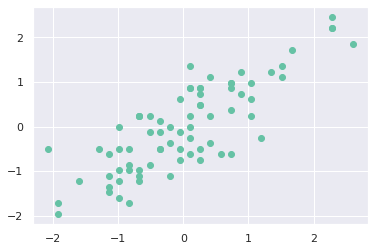

In [15]:
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1])

### 【問題5】学習と推定
最近傍法（k-nearest neighbors, k-nn）で学習を行います。scikit-learnの公式ドキュメントのExamplesを参考に、k-nnの学習を行ってください。ここで入力するのは訓練データです。

学習が終わった後、検証データをpredictメソッドに入力し、推定を行ってください。

パラメータが複数ありますが、今はそれらの理解を重視しません。最も基本的な要素として、n_neighborsの数があるため、これは複数試してみましょう。デフォルトの5、および1と3を最低限行ってください。5の場合を5-nn、3の場合を3-nnのように呼びます。

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
# n = 5
neigh_5 = KNeighborsClassifier(n_neighbors=5)
neigh_5.fit(X_train_scaled, y_train.ravel())
y_pred_5 = neigh_5.predict(X_test_scaled)
y_pred_5

array([2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 2])

In [18]:
# n = 1
neigh_1 = KNeighborsClassifier(n_neighbors=1)
neigh_1.fit(X_train_scaled, y_train.ravel())
y_pred_1 = neigh_1.predict(X_test_scaled)
y_pred_1

array([2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 2])

In [19]:
# n = 3
neigh_3 = KNeighborsClassifier(n_neighbors=3)
neigh_3.fit(X_train_scaled, y_train.ravel())
y_pred_3 = neigh_3.predict(X_test_scaled)
y_pred_3

array([2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 2])

In [20]:
# n = 10
neigh_10 = KNeighborsClassifier(n_neighbors=10)
neigh_10.fit(X_train_scaled, y_train.ravel())
y_pred_10 = neigh_10.predict(X_test_scaled)
y_pred_10

array([2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 2])

### 【問題6】評価
検証データの特徴量を入力して得られた推定値と、検証データの正解値の近さを計算し、学習したモデルを評価します。

2値分類を評価するための指標値には Accuracy（正解率）、Precision（適合率）、Recall（再現率）、F値 があります。それぞれの意味を理解するには、 混同行列（confusion matrix） を見ることになります。

- scikit-learnを使い4種類の指標を計算する
- 混同行列をscikit-learnを使い表示する
- 4種類の指標値の意味について簡単に調査して文章でまとめる

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [22]:
# scikit-learnを使い4種類の指標を計算する

# 正解率
print("n = 5の結果:{}".format(accuracy_score(y_test ,y_pred_5)))
print("n = 1の結果:{}".format(accuracy_score(y_test ,y_pred_1)))
print("n = 3の結果:{}".format(accuracy_score(y_test ,y_pred_3)))
print("n = 10の結果:{}".format(accuracy_score(y_test ,y_pred_10)))

n = 5の結果:0.76
n = 1の結果:0.84
n = 3の結果:0.76
n = 10の結果:0.84


In [23]:
# 適合率
print("n = 5の結果:{}".format(precision_score(y_test ,y_pred_5)))
print("n = 1の結果:{}".format(precision_score(y_test ,y_pred_1)))
print("n = 3の結果:{}".format(precision_score(y_test ,y_pred_3)))
print("n = 10の結果:{}".format(precision_score(y_test ,y_pred_10)))

n = 5の結果:1.0
n = 1の結果:1.0
n = 3の結果:1.0
n = 10の結果:1.0


In [24]:
# 再現率
print("n = 5の結果:{}".format(recall_score(y_test ,y_pred_5)))
print("n = 1の結果:{}".format(recall_score(y_test ,y_pred_1)))
print("n = 3の結果:{}".format(recall_score(y_test ,y_pred_3)))
print("n = 10の結果:{}".format(recall_score(y_test ,y_pred_10)))

n = 5の結果:0.6
n = 1の結果:0.7333333333333333
n = 3の結果:0.6
n = 10の結果:0.7333333333333333


In [25]:
# F値
print("n = 5の結果:{}".format(f1_score(y_test ,y_pred_5)))
print("n = 1の結果:{}".format(f1_score(y_test ,y_pred_1)))
print("n = 3の結果:{}".format(f1_score(y_test ,y_pred_3)))
print("n = 10の結果:{}".format(f1_score(y_test ,y_pred_10)))

n = 5の結果:0.7499999999999999
n = 1の結果:0.846153846153846
n = 3の結果:0.7499999999999999
n = 10の結果:0.846153846153846


In [26]:
# 混同行列をscikit-learnを使い表示する
print("n = 5")
print(confusion_matrix(y_test ,y_pred_5))
print("n = 1")
print(confusion_matrix(y_test ,y_pred_1))
print("n = 3")
print(confusion_matrix(y_test ,y_pred_3))
print("n = 10")
print(confusion_matrix(y_test ,y_pred_10))

n = 5
[[ 9  6]
 [ 0 10]]
n = 1
[[11  4]
 [ 0 10]]
n = 3
[[ 9  6]
 [ 0 10]]
n = 10
[[11  4]
 [ 0 10]]


In [27]:
# 4種類の指標値の意味について簡単に調査して文章でまとめる

以下のサイトを参照しました。

https://null-text.org/?p=3221

> 分類モデルによる対象のデータに対する予測結果は、予測されたクラスと実際のクラスの関係から以下のようにグループ分けされます。

>| 正解 | 予測 |     |
| :--  | :--  | :-- |
| Positive | Positive | TP(True Positive) |
| Positive | Negative | FN(False Negative) |
| Negative | Positive | FP(False Positive) |
| Negative | Negative | TN(True Negative) |

- Accuracy（正解率）

正答率（Accuracy）は予測結果のうち正解であったデータの割合です。分類モデルの性能を直観的に理解しやすいというメリットがあります。

$$
Accuracy=\frac{TP+TN}{TP+FP+FN+TN}
$$

- Precision（適合率）

適合率（Precision）はPositiveであると予測したデータのうち実際にPositiveであるものの割合です。

$$
Precision=\frac{TP}{TP+FP}
$$

- Recall（再現率）

再現率（Recall）は実際にPositiveであるデータのうちPositiveであると予測されたデータの割合です。

$$
Recall=\frac{TP}{TP+FN}
$$

- F値

F値（F-measure）は適合率、再現率の調和平均によって求められます。適合率と再現率はトレードオフの関係にありますが、これらをF値として一つの指標に統合することで性能の比較がしやすくなります。

$$
F-measure=\frac{2*Precision*Recall}{Precision+Recall} \\
=\frac{TP}{TP+\frac{1}{2}(FP+FN)}
$$


### 【問題7】可視化
評価の一貫として可視化を行います。今回の場合2次元の特徴量で分類を行いましたから、散布図で可視化が可能です。以下にどう分割するかという 決定領域 を描く関数を用意しました。これを利用して可視化を行ってください。Xとyには訓練データまたは検証データを与えます。

In [28]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

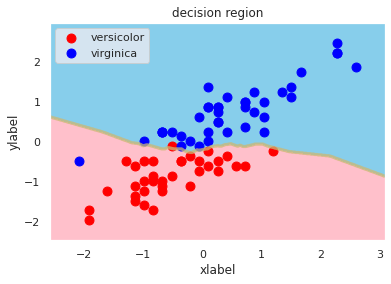

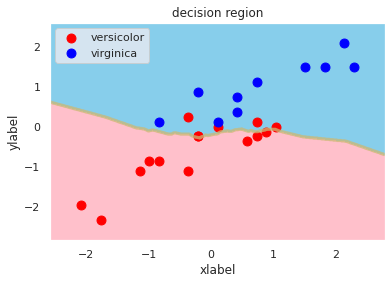

In [29]:
decision_region(X_train_scaled, y_train.ravel(), neigh_5)
decision_region(X_test_scaled, y_test.ravel(), neigh_5)

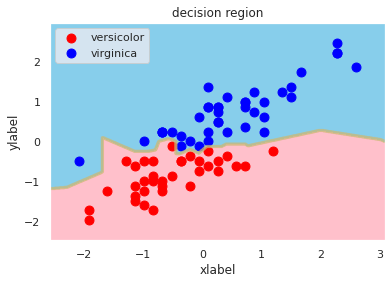

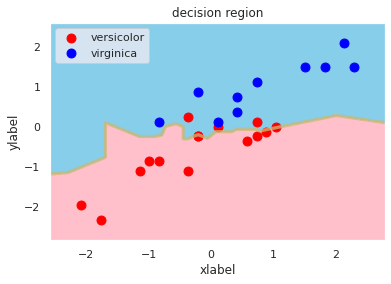

In [30]:
decision_region(X_train_scaled, y_train.ravel(), neigh_1)
decision_region(X_test_scaled, y_test.ravel(), neigh_1)

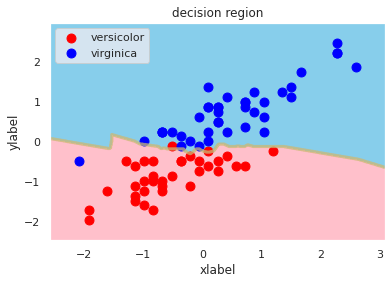

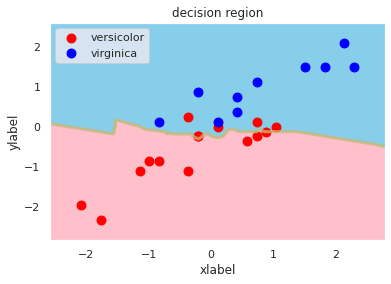

In [31]:
decision_region(X_train_scaled, y_train.ravel(), neigh_3)
decision_region(X_test_scaled, y_test.ravel(), neigh_3)

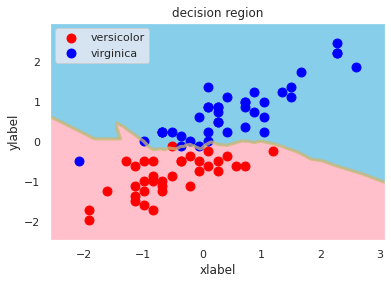

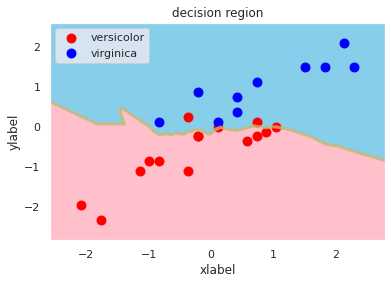

In [32]:
decision_region(X_train_scaled, y_train.ravel(), neigh_10)
decision_region(X_test_scaled, y_test.ravel(), neigh_10)

### 【問題8】他の手法の学習
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と決定領域を利用して結果を簡単に考察してください。どの手法がどの指標値で良かったかや、どういった決定領域になっていたかを述べてください。

- 最近傍法
- ロジスティック回帰
- SVM
- 決定木
- ランダムフォレスト

公式ドキュメントへのリンクは以下です。それぞれ調整すべき引数（ハイパーパラメータ）がありますが、この課題では扱いません。まずはデフォルトの値で実行してください。

In [51]:
# 試験用関数の定義
def train2plot(X_train, X_test, y_train, y_test, model):
    model.fit(X_train, y_train.ravel())
    y_pred = model.predict(X_test)
    print("正解率:{}".format(accuracy_score(y_test ,y_pred)))
    print("適合率:{}".format(precision_score(y_test ,y_pred)))
    print("再現率:{}".format(recall_score(y_test ,y_pred)))
    print("F値:{}".format(f1_score(y_test ,y_pred)))
    print("混合行列")
    print(confusion_matrix(y_test ,y_pred))
    decision_region(X_train, y_train.ravel(), model)
    decision_region(X_test, y_test.ravel(), model)

正解率:0.76
適合率:1.0
再現率:0.6
F値:0.7499999999999999
混合行列
[[ 9  6]
 [ 0 10]]


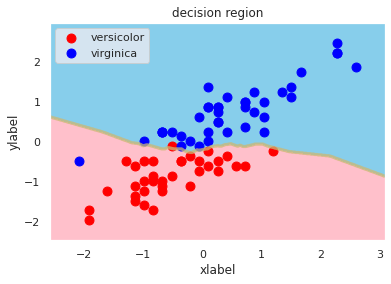

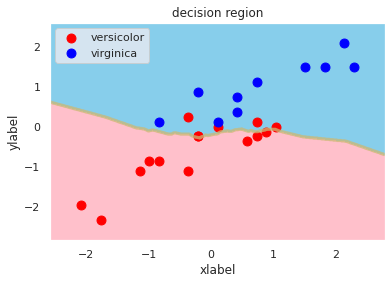

In [52]:
# 最近傍法
from sklearn.neighbors import KNeighborsClassifier

kneigh = KNeighborsClassifier()

train2plot(X_train_scaled, X_test_scaled, y_train, y_test, kneigh)

正解率:0.84
適合率:1.0
再現率:0.7333333333333333
F値:0.846153846153846
混合行列
[[11  4]
 [ 0 10]]


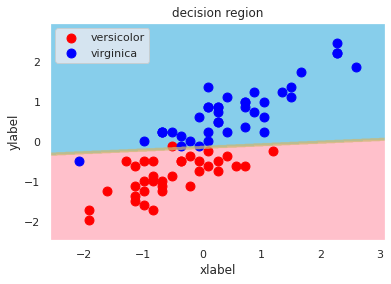

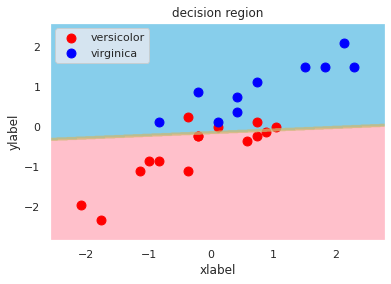

In [53]:
# ロジスティック回帰
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

train2plot(X_train_scaled, X_test_scaled, y_train, y_test, logreg)

正解率:0.84
適合率:1.0
再現率:0.7333333333333333
F値:0.846153846153846
混合行列
[[11  4]
 [ 0 10]]


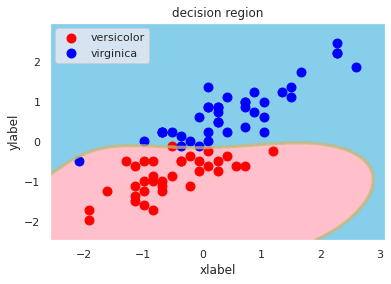

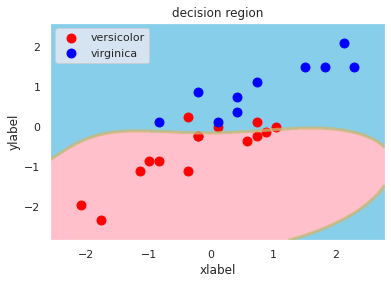

In [54]:
# SVM
from sklearn.svm import SVC

svc = SVC()

train2plot(X_train_scaled, X_test_scaled, y_train, y_test, svc)

正解率:0.76
適合率:1.0
再現率:0.6
F値:0.7499999999999999
混合行列
[[ 9  6]
 [ 0 10]]


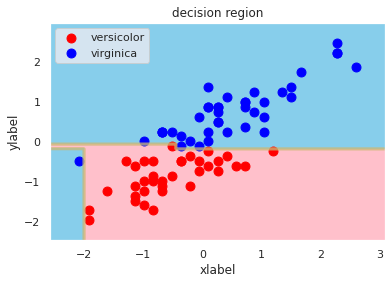

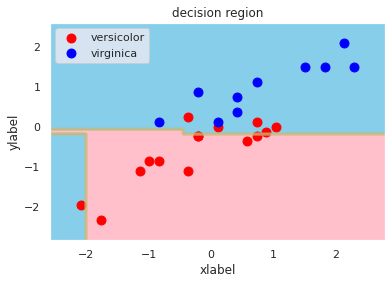

In [55]:
# 決定木
from sklearn.tree import DecisionTreeClassifier

dectr = DecisionTreeClassifier()

train2plot(X_train_scaled, X_test_scaled, y_train, y_test, dectr)

正解率:0.8
適合率:1.0
再現率:0.6666666666666666
F値:0.8
混合行列
[[10  5]
 [ 0 10]]


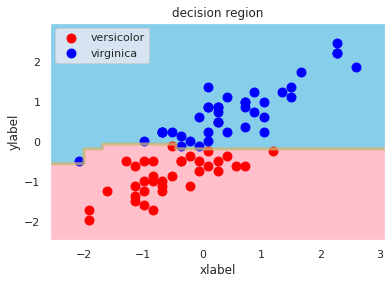

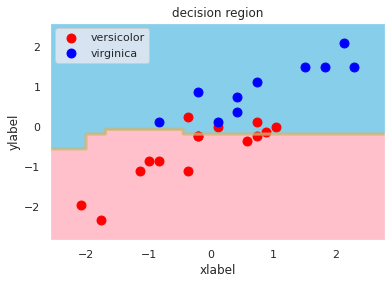

In [56]:
# ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier

rndmforest = RandomForestClassifier()

train2plot(X_train_scaled, X_test_scaled, y_train, y_test, rndmforest)

#### 結果考察
結果を表にまとめる。

1. 最近傍法

| 正解率 | 適合率 | 再現率 | F値  |
| :---   | :---   | :--    | :--- |
| 0.76   | 1.0    | 0.6    | 0.7499999999999999 |

2. ロジスティック回帰

| 正解率 | 適合率 | 再現率 | F値  |
| :---   | :---   | :--    | :--- |
| 0.84   | 1.0    | 0.7333333333333333 | 0.846153846153846 |

3. SVM

| 正解率 | 適合率 | 再現率 | F値  |
| :---   | :---   | :--    | :--- |
| 0.84   | 1.0    | 0.7333333333333333 | 0.846153846153846 |

4. 決定木

| 正解率 | 適合率 | 再現率 | F値  |
| :---   | :---   | :--    | :--- |
| 0.76   | 1.0    | 0.6    | 0.7499999999999999 |

5. ランダムフォレスト

| 正解率 | 適合率 | 再現率 | F値  |
| :---   | :---   | :--    | :--- |
| 0.8    | 1.0    | 0.6666666666666666 | 0.8 |


- ロジスティック回帰・SVMにおいて、すべての指標値が最大になった。
- ランダムフォレストが２番めに性能が良かった。指標の組み合わせについても、全てが２番めに良い。
- 最近傍法と決定木が、すべての指標について最も性能が良くない。
- すべての手法について、適合率が1.0になった。→テストデータにおいてラベル0を誤ってラベル1と判定することが無かった。
- すべての手法について、再現率が低いように見える。→テストデータにおいてラベル1を誤ってラベル0と判定することが多かった。(何をもって指標値が低いと判断されるかはわからない)
- ロジスティック回帰は直線的に境界を引いている。
- SVM、再近傍法はなめらかな境界を引いている。
- 決定木、ランダムフォレストは直線的だが、複数の条件を組み合わせるように直角に境界が引かれている。

### 【問題9】（アドバンス課題）標準化の有無の比較
前処理として標準化を行いましたが、これを行わなかった場合どのような結果が得られるでしょうか。各手法に対しての指標値の表と決定領域の図を作成し比較および考察を行ってください。考察には標準化が機械学習の前処理としてどのような意味があるかを絡めてください。

正解率:0.76
適合率:1.0
再現率:0.6
F値:0.7499999999999999
混合行列
[[ 9  6]
 [ 0 10]]


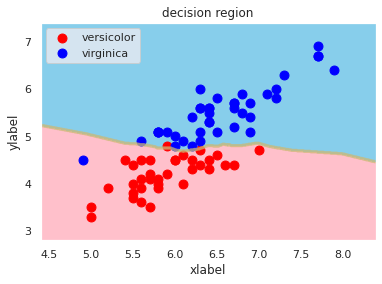

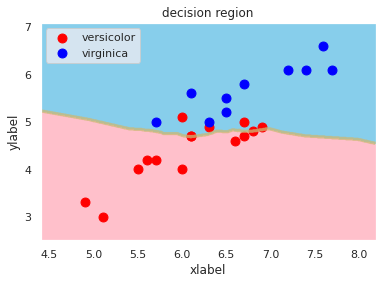

In [57]:
# 最近傍法
kneigh_2 = KNeighborsClassifier()

train2plot(X_train, X_test, y_train, y_test, kneigh_2)

正解率:0.8
適合率:1.0
再現率:0.6666666666666666
F値:0.8
混合行列
[[10  5]
 [ 0 10]]


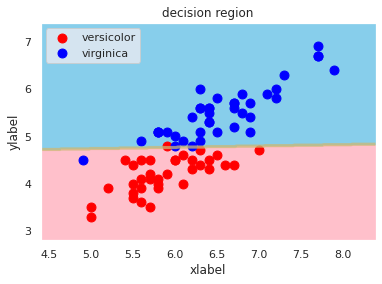

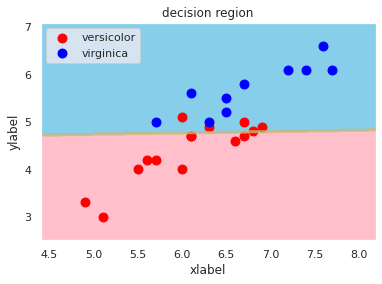

In [58]:
# ロジスティック回帰
logreg_2 = LogisticRegression()

train2plot(X_train, X_test, y_train, y_test, logreg_2)

正解率:0.8
適合率:1.0
再現率:0.6666666666666666
F値:0.8
混合行列
[[10  5]
 [ 0 10]]


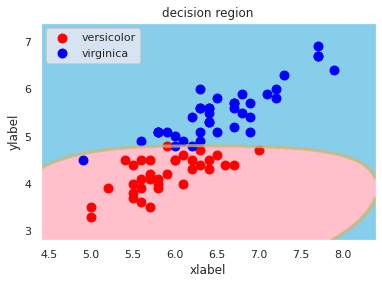

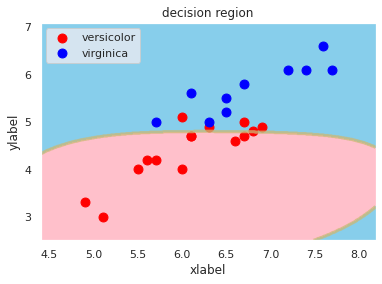

In [59]:
# SVM
svc_2 = SVC()

train2plot(X_train, X_test, y_train, y_test, svc_2)

正解率:0.76
適合率:1.0
再現率:0.6
F値:0.7499999999999999
混合行列
[[ 9  6]
 [ 0 10]]


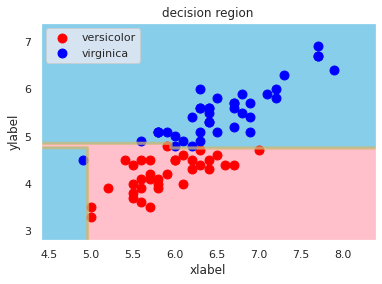

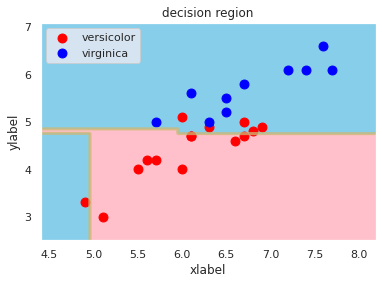

In [61]:
# 決定木
dectr_2 = DecisionTreeClassifier()

train2plot(X_train, X_test, y_train, y_test, dectr_2)

正解率:0.8
適合率:1.0
再現率:0.6666666666666666
F値:0.8
混合行列
[[10  5]
 [ 0 10]]


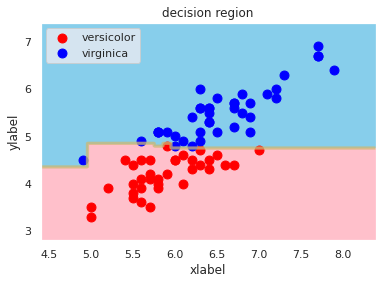

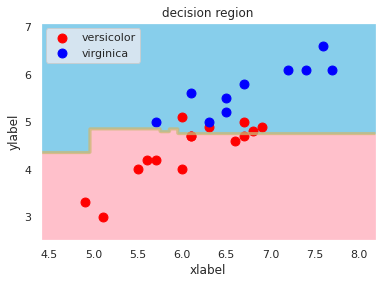

In [62]:
# ランダムフォレスト
rndmforest_2 = RandomForestClassifier()

train2plot(X_train, X_test, y_train, y_test, rndmforest_2)

#### 結果
ロジスティック回帰とSVMで指標値が全体的に下がった。

#### 考察
各説明変数間のスケールが異なる場合、スケールの大きい変数が学習に影響を与えてしまう。標準化をすることで、スケールの異なる複数の説明変数を正規化できる。
- ロジスティック回帰

２値分類であれば、シグモイド関数でそれぞれの確率が0.5を超えるかそうでないかという判断で分類を行う。

- SVM

識別面からの特徴ベクトルの距離によって境界が決まる(マージン最大化)。

今回、標準化によって性能が良くなった上記の２モデルは、どちらも各特徴量のスケールの違いを無くすことで、平面の中では特徴量の分布の偏りを抑えられ、その結果、分類の性能が良くなっていたのではないかと考える。

### 【問題10】（アドバンス課題）全ての目的変数を使用して精度が高い手法
ここまではアヤメの種類を減らし2値分類を行ってきましたが、3種類全てを使った多値分類を行います。学習と推定、評価を行って、最も精度の高い手法を探してください。

《多値になることでの変更点》

指標値Precision（適合率）、Recall（再現率）、F値はライブラリのパラメータをデフォルトから変更する必要があります。マイクロ平均やマクロ平均という考え方を使います。

In [76]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region_2(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['setosa', 'versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue', 'green']
    contourf_color = ['pink', 'skyblue', 'lime']
    n_class = 3
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

def train2plot_2(X_train, X_test, y_train, y_test, model):
    model.fit(X_train, y_train.ravel())
    y_pred = model.predict(X_test)
    # マクロ平均で計算
    print("正解率:{}".format(accuracy_score(y_test ,y_pred)))
    print("適合率:{}".format(precision_score(y_test ,y_pred, average='macro')))
    print("再現率:{}".format(recall_score(y_test ,y_pred, average='macro')))
    print("F値:{}".format(f1_score(y_test ,y_pred, average='macro')))
    print("混合行列")
    print(confusion_matrix(y_test ,y_pred))
    decision_region_2(X_train, y_train.ravel(), model)
    decision_region_2(X_test, y_test.ravel(), model)

In [65]:
X = pd.DataFrame(data=data.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
X = X[['sepal_length', 'petal_length']]
y = pd.DataFrame(data=data.target, columns=['Species'])

df = pd.concat([X, y], axis=1)
df.describe()

,sepal_length,petal_length,Species
count,150.000000,150.000000,150.000000
mean,5.843333,3.758000,1.000000
std,0.828066,1.765298,0.819232
min,4.300000,1.000000,0.000000
25%,5.100000,1.600000,0.000000
50%,5.800000,4.350000,1.000000
75%,6.400000,5.100000,2.000000
max,7.900000,6.900000,2.000000


In [66]:
X = np.array(df[['sepal_length', 'petal_length']])
y = np.array(df['Species'])

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=32)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(112, 2)
(38, 2)
(112, 1)
(38, 1)


In [67]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

正解率:0.9736842105263158
適合率:0.9722222222222222
再現率:0.9696969696969697
F値:0.9696342305037957
混合行列
[[16  0  0]
 [ 0 11  0]
 [ 0  1 10]]


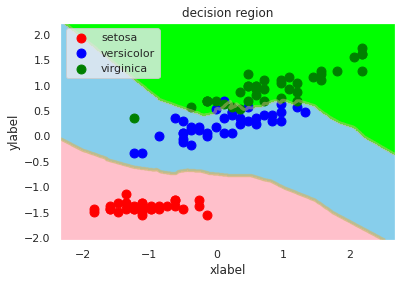

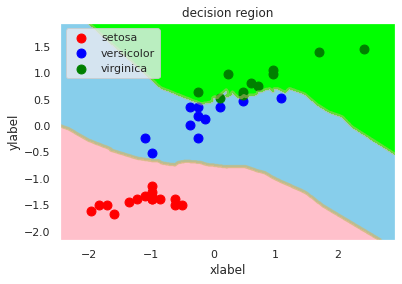

In [75]:
# 最近傍法
kneigh_3 = KNeighborsClassifier()

train2plot_2(X_train_scaled, X_test_scaled, y_train, y_test, kneigh_3)

正解率:0.9473684210526315
適合率:0.9487179487179488
再現率:0.9393939393939394
F値:0.9388888888888888
混合行列
[[16  0  0]
 [ 0 11  0]
 [ 0  2  9]]


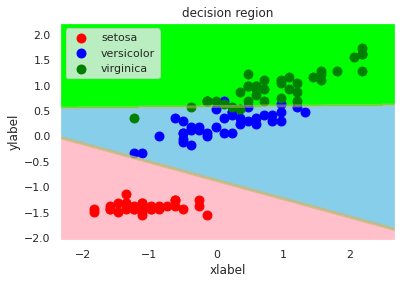

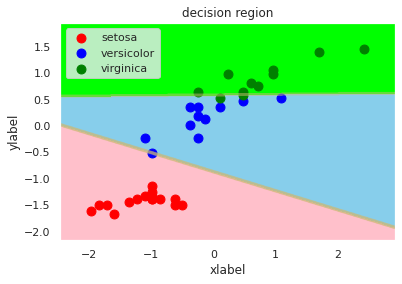

In [77]:
# ロジスティック回帰
logreg_3 = LogisticRegression()

train2plot_2(X_train_scaled, X_test_scaled, y_train, y_test, logreg_3)

正解率:0.9473684210526315
適合率:0.9487179487179488
再現率:0.9393939393939394
F値:0.9388888888888888
混合行列
[[16  0  0]
 [ 0 11  0]
 [ 0  2  9]]


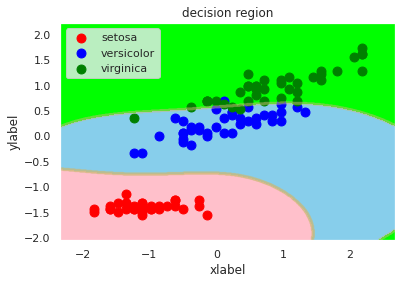

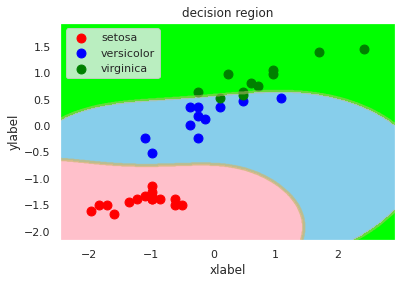

In [78]:
# SVM
svc_3 = SVC()

train2plot_2(X_train_scaled, X_test_scaled, y_train, y_test, svc_3)

正解率:0.9473684210526315
適合率:0.9487179487179488
再現率:0.9393939393939394
F値:0.9388888888888888
混合行列
[[16  0  0]
 [ 0 11  0]
 [ 0  2  9]]


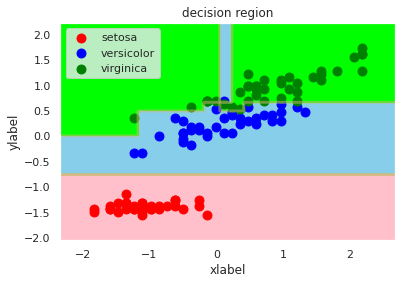

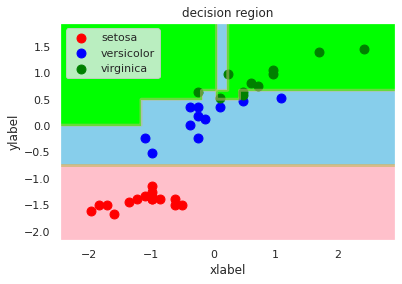

In [79]:
# 決定木
dectr_3 = DecisionTreeClassifier()

train2plot_2(X_train_scaled, X_test_scaled, y_train, y_test, dectr_3)

正解率:0.9473684210526315
適合率:0.9487179487179488
再現率:0.9393939393939394
F値:0.9388888888888888
混合行列
[[16  0  0]
 [ 0 11  0]
 [ 0  2  9]]


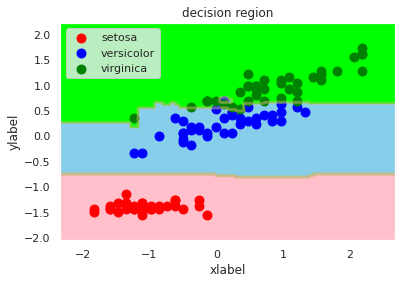

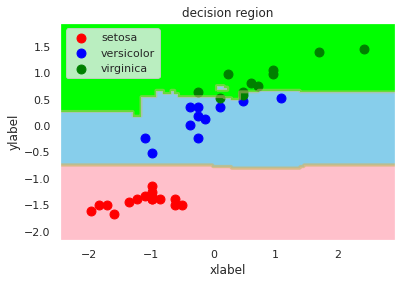

In [80]:
# ランダムフォレスト
rndmforest_3 = RandomForestClassifier()

train2plot_2(X_train_scaled, X_test_scaled, y_train, y_test, rndmforest_3)

再近傍法が最も指標値が高くなった。